Members: Yichen Lin, Jiamu Chen, Arion Eidos (Yuqi Zhang)
Source: https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset

In [1]:
import numpy as np
import pandas as pd
from fractions import Fraction
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
datanew=data.drop(columns=['Occupation'])
datanew=datanew.set_index('Person ID')
bmi_mapping = {
    'Normal Weight': 0,
    'Normal': 1,
    'Overweight': 2,
    'Obese': 3
}

# process columns
datanew['BMI Category'] = datanew['BMI Category'].map(bmi_mapping)
datanew[['HBP', 'DBP']] = datanew['Blood Pressure'].str.split('/', expand=True)
datanew=datanew.drop(columns=['Blood Pressure','Sleep Disorder'])



In [3]:
datanew

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,HBP,DBP
Person ID,,,,,,,,,,,
1,Male,27,6.1,6,42,6,2,77,4200,126,83
2,Male,28,6.2,6,60,8,1,75,10000,125,80
3,Male,28,6.2,6,60,8,1,75,10000,125,80
4,Male,28,5.9,4,30,8,3,85,3000,140,90
5,Male,28,5.9,4,30,8,3,85,3000,140,90
...,...,...,...,...,...,...,...,...,...,...,...
370,Female,59,8.1,9,75,3,2,68,7000,140,95
371,Female,59,8.0,9,75,3,2,68,7000,140,95
372,Female,59,8.1,9,75,3,2,68,7000,140,95


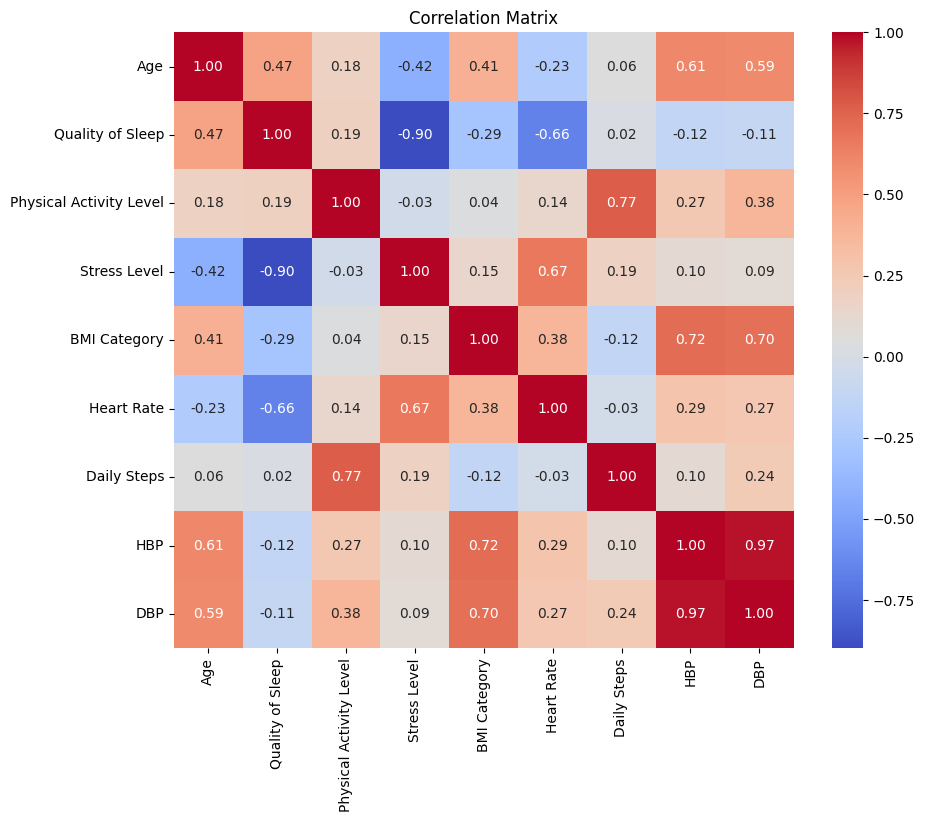

In [4]:
#sample data 
datas=datanew.drop(columns=['Gender','Sleep Duration'])

#choose variable based on correlation
correlation_matrix = datas.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [5]:
data_use=datanew[['Age','BMI Category','Physical Activity Level','Stress Level','HBP','Sleep Duration']]
data_use

,Age,BMI Category,Physical Activity Level,Stress Level,HBP,Sleep Duration
Person ID,,,,,,
1,27,2,42,6,126,6.1
2,28,1,60,8,125,6.2
3,28,1,60,8,125,6.2
4,28,3,30,8,140,5.9
5,28,3,30,8,140,5.9
...,...,...,...,...,...,...
370,59,2,75,3,140,8.1
371,59,2,75,3,140,8.0
372,59,2,75,3,140,8.1


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Data set
X = data_use.drop(columns=['Sleep Duration'])  # 特征变量
y = data_use['Sleep Duration']  # 目标变量

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Results
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R-squared (R2):", r2_score(y_test, y_pred))


Mean Squared Error (MSE): 0.15807185422782272
R-squared (R2): 0.7625731169274164


In [9]:
# 查看模型系数和截距
coefficients = model.coef_  # 获取每个特征的系数
intercept = model.intercept_  # 获取截距

# 将特征名称和系数组合成一个 DataFrame
import pandas as pd
coeff_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})

# 打印系数和截距
print("Coefficients:")
print(coeff_df)
print("\nIntercept:")
print(intercept)


Coefficients:
                   Feature  Coefficient
0                      Age     0.018808
1             BMI Category    -0.328299
2  Physical Activity Level     0.007308
3             Stress Level    -0.299703
4                      HBP    -0.009721

Intercept:
9.210484580071318


In [10]:
equation = f"Sleep Duration = "
for i, coef in enumerate(coefficients):
    equation += f"{coef:.3f} * {X.columns[i]} + "
equation += f"{intercept:.3f}"
print(equation)

Sleep Duration = 0.019 * Age + -0.328 * BMI Category + 0.007 * Physical Activity Level + -0.300 * Stress Level + -0.010 * HBP + 9.210
